In [1]:
import os

In [11]:
root = "results"
dir_type = "colored"
path_to_hypes = os.path.join(root, dir_type)
tunes = os.listdir(path_to_hyperparameters)
tunes

['tune_batches', 'tune_epochs', 'tune_lr']

In [12]:
tunes_dict = {}
for t in tunes:
    tunes_dict[t] = os.listdir(os.path.join(path_to_hypes, t))

tunes_dict

{'tune_batches': ['ncd_pix2pix_batch_1',
  'ncd_pix2pix_batch_16',
  'ncd_pix2pix_batch_2',
  'ncd_pix2pix_batch_32',
  'ncd_pix2pix_batch_4',
  'ncd_pix2pix_batch_64',
  'ncd_pix2pix_batch_8'],
 'tune_epochs': ['ncd_pix2pix_epochs_2_8',
  'ncd_pix2pix_epochs_4_6',
  'ncd_pix2pix_epochs_5_5',
  'ncd_pix2pix_epochs_6_4',
  'ncd_pix2pix_epochs_8_2'],
 'tune_lr': ['ncd_pix2pix_lr_0.0001',
  'ncd_pix2pix_lr_0.0002',
  'ncd_pix2pix_lr_0.0005',
  'ncd_pix2pix_lr_2e-05']}

In [31]:
imgs_dir = os.path.join(path_to_hypes, 'tune_batches', tunes_dict['tune_batches'][0], 'test_latest', 'images')
imgs = os.listdir(imgs_dir)
imgs_dir

'results\\colored\\tune_batches\\ncd_pix2pix_batch_1\\test_latest\\images'

In [110]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import cv2
import matplotlib.pyplot as plt
import statistics

# create a dictionary
hypes = {}
# for each hyperparameter (i.e. tune_batches)
for t in tunes:
    # create PSNR list & SSIM list
    PSNR = []
    SSIM = []
    # for each run (i.e. batch_1)
    for experiment in tunes_dict[t]:
        # get list of all images (i.e. Apple10)
        path = os.path.join(path_to_hypes, t, experiment, 'test_latest', 'images')
        images = os.listdir(path)
        # get the unique names after splitting them
        unique_names = set([i.split('_')[0] for i in images])        
        # for each unique set of images
        for name in unique_names:
            # append fake_B_rgb.png to get fake_img
            assert os.path.isfile(os.path.join(path, name+'_fake_B_rgb.png'))
            fake_img = cv2.imread(os.path.join(path, name+'_fake_B_rgb.png'))
            
            # append real_B_rgb.png to get real_img
            assert os.path.isfile(os.path.join(path, name+'_real_B_rgb.png'))
            real_img = cv2.imread(os.path.join(path, name+'_real_B_rgb.png'))
            
            # calculate PSNR
            psnr = peak_signal_noise_ratio(real_img, fake_img)
            # calculate SSIM
            ssim =  structural_similarity(real_img, fake_img, channel_axis=2)
            # append to respective lists
            PSNR.append(psnr)
            SSIM.append(ssim)
        # average values & get std dev
        stats_psnr = [round(statistics.mean(PSNR), 3), round(statistics.stdev(PSNR),3)]
        stats_ssim = [round(statistics.mean(SSIM), 3), round(statistics.stdev(SSIM),3)]
#         stats_psnr = str(round(statistics.mean(PSNR), 3)) + '/' + str(round(statistics.stdev(PSNR),3))
#         stats_ssim = str(round(statistics.mean(SSIM), 3)) + '/' + str(round(statistics.stdev(SSIM),3))
        
        # add to dictionary value specific to each run
        hypes[experiment] = {'psnr': stats_psnr, 'ssim': stats_ssim}
        print(hypes[experiment])

{'psnr': [18.798, 3.885], 'ssim': [0.861, 0.049]}
{'psnr': [18.193, 2.94], 'ssim': [0.834, 0.052]}
{'psnr': [18.408, 2.625], 'ssim': [0.838, 0.048]}
{'psnr': [18.216, 2.383], 'ssim': [0.829, 0.049]}
{'psnr': [18.295, 2.234], 'ssim': [0.83, 0.047]}
{'psnr': [18.243, 2.107], 'ssim': [0.825, 0.048]}
{'psnr': [18.261, 2.031], 'ssim': [0.825, 0.046]}
{'psnr': [18.497, 4.085], 'ssim': [0.856, 0.048]}
{'psnr': [18.568, 3.857], 'ssim': [0.857, 0.048]}
{'psnr': [18.561, 3.745], 'ssim': [0.857, 0.047]}
{'psnr': [18.724, 3.762], 'ssim': [0.858, 0.047]}
{'psnr': [18.75, 3.819], 'ssim': [0.858, 0.047]}
{'psnr': [18.506, 3.794], 'ssim': [0.846, 0.047]}
{'psnr': [18.738, 3.565], 'ssim': [0.849, 0.047]}
{'psnr': [18.711, 3.854], 'ssim': [0.856, 0.05]}
{'psnr': [18.964, 3.775], 'ssim': [0.849, 0.051]}


In [69]:

# # for i in range(3):
# #     plt.axis("off")
# #     image = cv2.imread(os.path.join(os.path.join(path_to_hypes, 'tune_batches', tunes_dict['tune_batches'][0], 'test_latest', 'images'), imgs[i]))
# #     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# #     plt.show()
# image_real = cv2.imread(os.path.join(os.path.join(path_to_hypes, 'tune_batches', tunes_dict['tune_batches'][0], 'test_latest', 'images'), imgs[0]))

# image_fake = cv2.imread(os.path.join(os.path.join(path_to_hypes, 'tune_batches', tunes_dict['tune_batches'][0], 'test_latest', 'images'), imgs[3]))

# print('PSNR value:', peak_signal_noise_ratio(image_real, image_fake))
# print('SSIM value:', structural_similarity(image_real, image_fake, channel_axis=2))

PSNR value: 11.605895230834676
SSIM value: 0.6840249614455058


In [108]:
# import pandas as pd
# string_hypes = pd.DataFrame(hypes)

In [125]:
# for t in tunes:
#     # create PSNR list & SSIM list
#     # for each run (i.e. batch_1)
#     psnrs = []
#     ssims = []
#     max_psnr = ('', -1)
#     max_ssim = ('', -1)
    
#     min_psnr = ('', 1000)
#     min_ssim = ('', 1000)
# #     plt.figure()
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.suptitle(t.split('_')[1])
#     for experiment in tunes_dict[t]:
#         if hypes[experiment]['psnr'][0] > max_psnr[1]:
#             max_psnr = (experiment, hypes[experiment]['psnr'][0])
            
            
#         if hypes[experiment]['ssim'][0] > max_ssim[1]:
#             max_ssim = (experiment, hypes[experiment]['ssim'][0])
            
            
#         if hypes[experiment]['psnr'][0] < min_psnr[1]:
#             min_psnr = (experiment, hypes[experiment]['psnr'][0])

#         if hypes[experiment]['ssim'][0] < min_ssim[1]:
#             min_ssim = (experiment, hypes[experiment]['ssim'][0])
            
#         psnrs.append((experiment, hypes[experiment]['psnr'][0]))
#         ssims.append((experiment, hypes[experiment]['ssim'][0]))
#     print(t.split('_')[1],'(max psnr):', max_psnr)
#     print(t.split('_')[1],'(max ssim):', max_ssim)
    
    
#     print(t.split('_')[1],'(min psnr):', min_psnr)
#     print(t.split('_')[1],'(min ssim):', min_ssim)
#     ax1.plot(psnrs)
#     ax2.plot(ssims)

        

In [123]:
string_hypes

,ncd_pix2pix_batch_1,ncd_pix2pix_batch_16,ncd_pix2pix_batch_2,ncd_pix2pix_batch_32,ncd_pix2pix_batch_4,ncd_pix2pix_batch_64,ncd_pix2pix_batch_8,ncd_pix2pix_epochs_2_8,ncd_pix2pix_epochs_4_6,ncd_pix2pix_epochs_5_5,ncd_pix2pix_epochs_6_4,ncd_pix2pix_epochs_8_2,ncd_pix2pix_lr_0.0001,ncd_pix2pix_lr_0.0002,ncd_pix2pix_lr_0.0005,ncd_pix2pix_lr_2e-05
psnr,18.798/3.885,18.193/2.94,18.408/2.625,18.216/2.383,18.295/2.234,18.243/2.107,18.261/2.031,18.497/4.085,18.568/3.857,18.561/3.745,18.724/3.762,18.75/3.819,18.506/3.794,18.738/3.565,18.711/3.854,18.964/3.775
ssim,0.861/0.049,0.834/0.052,0.838/0.048,0.829/0.049,0.83/0.047,0.825/0.048,0.825/0.046,0.856/0.048,0.857/0.048,0.857/0.047,0.858/0.047,0.858/0.047,0.846/0.047,0.849/0.047,0.856/0.05,0.849/0.051


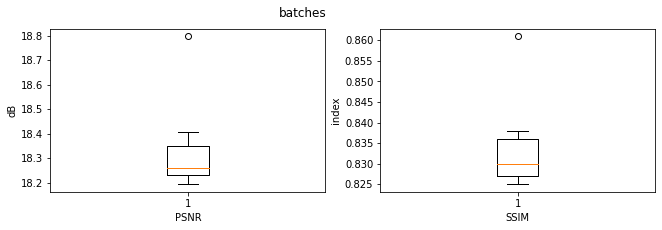

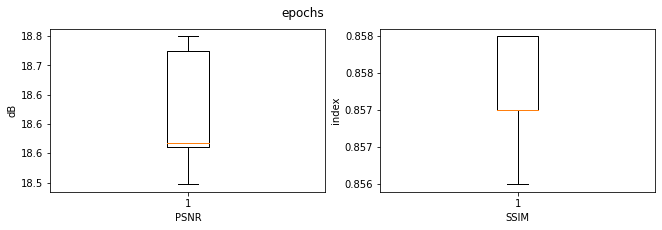

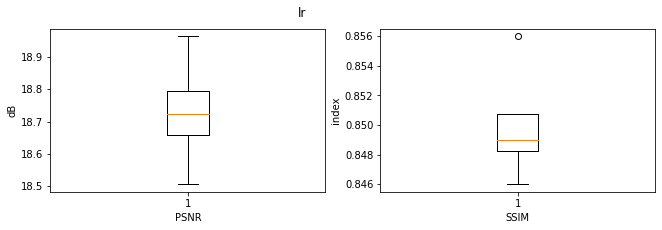

In [162]:
from matplotlib.ticker import FormatStrFormatter
for t in tunes:
    # create PSNR list & SSIM list
    # for each run (i.e. batch_1)
    psnrs = []
    ssims = []
#     plt.figure()
    fig, (ax1, ax2) = plt.subplots(1, 3, figsize=(7,3), sharex=False, sharey=False)
    fig.suptitle('PSNR')
    plt.subplots_adjust(left=0, bottom=None, right=1.2, top=None, wspace=None, hspace=None)
    
    for experiment in tunes_dict[t]:
        psnrs.append(hypes[experiment]['psnr'][0])
        ssims.append(hypes[experiment]['ssim'][0])
    ax1.boxplot(psnrs)
    ax1.set_xlabel('PSNR')
    ax1.set_ylabel('dB')
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    ax2.boxplot(ssims)
    ax2.set_xlabel('SSIM')
    ax2.set_ylabel('index')
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    

        

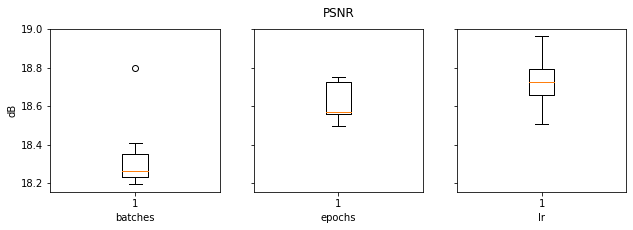

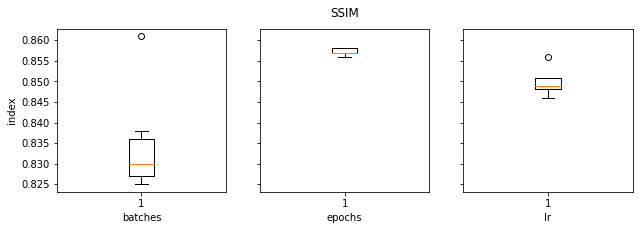

In [170]:
from matplotlib.ticker import FormatStrFormatter
psnrs = []
ssims = []
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,3), sharey=True)
fig.suptitle('PSNR')
plt.subplots_adjust(left=0, bottom=None, right=1, top=None, wspace=None, hspace=None)

fig1, (ax11, ax22, ax33) = plt.subplots(1, 3, figsize=(8,3), sharey=True)
fig1.suptitle('SSIM')
plt.subplots_adjust(left=0, bottom=None, right=1, top=None, wspace=None, hspace=None)

for t in tunes:
    # create PSNR list & SSIM list
    # for each run (i.e. batch_1)
    ps = []
    ss = []
#     plt.figure()
    
    for experiment in tunes_dict[t]:
        ps.append(hypes[experiment]['psnr'][0])
        ss.append(hypes[experiment]['ssim'][0])
    
    psnrs.append(ps)
    ssims.append(ss)

ax1.boxplot(psnrs[0])
ax1.set_xlabel('batches')
ax1.set_ylabel('dB')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax2.boxplot(psnrs[1])
ax2.set_xlabel('epochs')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax3.boxplot(psnrs[2])
ax3.set_xlabel('lr')
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


ax11.boxplot(ssims[0])
ax11.set_xlabel('batches')
ax11.set_ylabel('index')
ax11.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax22.boxplot(ssims[1])
ax22.set_xlabel('epochs')
ax22.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax33.boxplot(ssims[2])
ax33.set_xlabel('lr')
ax33.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))


In [ ]:

# for i in range(3):
#     plt.axis("off")
#     image = cv2.imread(os.path.join(os.path.join(path_to_hypes, 'tune_batches', tunes_dict['tune_batches'][0], 'test_latest', 'images'), imgs[i]))
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.show()
image_real = cv2.imread(os.path.join(os.path.join(path_to_hypes, 'tune_batches', tunes_dict['tune_batches'][0], 'test_latest', 'images'), imgs[0]))

image_fake = cv2.imread(os.path.join(os.path.join(path_to_hypes, 'tune_batches', tunes_dict['tune_batches'][0], 'test_latest', 'images'), imgs[3]))

print('PSNR value:', peak_signal_noise_ratio(image_real, image_fake))
print('SSIM value:', structural_similarity(image_real, image_fake, channel_axis=2))

19.878384757329624 13.586817103629087 13.946928724973484
0.8456309151606144 0.8645946719971733 0.8336671030000545


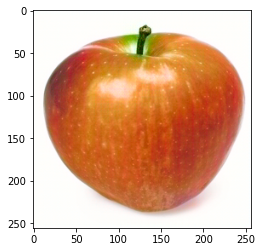

In [187]:
pix2pix = cv2.imread('Apple 12/Apple12_fake_B_rgb.png')
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
eccv16 = cv2.imread('Apple 12/saved_eccv16.png')
siggraph17 = cv2.imread('Apple 12/saved_siggraph17.png')
real = cv2.imread('Apple 12/Apple12_real_B_rgb.png')
real1 = cv2.imread('Apple 12/Apple12-2.jpg')
print(peak_signal_noise_ratio(real, pix2pix), peak_signal_noise_ratio(real1, eccv16), peak_signal_noise_ratio(real1, siggraph17))
print(structural_similarity(real, pix2pix, channel_axis=2), structural_similarity(real1, eccv16, channel_axis=2), structural_similarity(real1, siggraph17, channel_axis=2))